El objetivo del siguiente codigo es calcular las Sensibilidades de Cada parametro con respecto a $w_o$ y $Q$

In [107]:
%pip install matplotlib
import sympy as ss
from sympy import *
import matplotlib.pyplot as plt
from IPython.display import display, Math

#init_printing()  # Habilita la impresión bonita si estás en Jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


High-Pass Notch

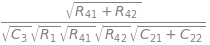

In [108]:
import sympy as ss

# Definición de símbolos
wo, Q = ss.symbols(r'\omega_o Q')
n2, no = ss.symbols('n2, n1')

# Conductancias y capacitores
Ga1, Ga2, Gb, G1, G41, G42 = ss.symbols('G_{a1} G_{a2} G_b G_1 G_{41} G_{42}', positive=True)
C3, C22, C21 = ss.symbols('C_3 C_{22} C_{21}', positive=True)

# Resistencias asociadas
Ra1, Ra2, Rb, R1, R41, R42 = ss.symbols('R_{a1} R_{a2} R_b R_1 R_{41} R_{42}', positive=True)

# Definición de omega_0 y Q
wo = ss.sqrt((G1 * (G41 + G42)) / (C3 * (C21 + C22)))

Q = wo * (
    (G41 + G42) * (1 / (C21 + C22) + 1 / C3)
    - (G1 / (C21 + C22)) * ((Ga1 + Ga2) / Gb)
)

# Sustitución de conductancias por resistencias
subs_dict_Q = {
    G1: 1 / R1,
    G41: 1 / R41,
    G42: 1 / R42,
    Ga1: 1 / Ra1,
    Ga2: 1 / Ra2,
    Gb: 1 / Rb,
}

subs_dict_wo = {
    G1: 1 / R1,
    G41: 1 / R41,
    G42: 1 / R42,
}

Q_res = Q.subs(subs_dict_Q).simplify()
wo_res = wo.subs(subs_dict_wo).simplify()
wo_res


In [109]:
# Diccionario de derivadas
derivadasWo = {
    r"\frac{dwo}{dR_{a1}}":     wo_res.diff(Ra1),
    r"\frac{dwo}{dR_{a2}}":     wo_res.diff(Ra2),
    r"\frac{dwo}{dR_{b}}":      wo_res.diff(Rb),
    r"\frac{dwo}{dR_{41}}":     wo_res.diff(R41),
    r"\frac{dwo}{dR_{42}}":     wo_res.diff(R42),
    r"\frac{dwo}{dR_{1}}":      wo_res.diff(R1),
    r"\frac{dwo}{dC_{21}}":     wo_res.diff(C21),
    r"\frac{dwo}{dC_{22}}":     wo_res.diff(C22),
    r"\frac{dwo}{dC_{3}}":      wo_res.diff(C3),
}

# Mostrar cada derivada en formato renderizado LaTeX
for nombre, expr in derivadasWo.items():
    display(Math(f"{nombre} = {latex(expr.simplify())}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [110]:
# Diccionario de derivadas
derivadasQ = {
    r"\frac{dQ}{dR_{a1}}": Q_res.diff(Ra1),
    r"\frac{dQ}{dR_{a2}}": Q_res.diff(Ra2),
    r"\frac{dQ}{dR_{b}}": Q_res.diff(Rb),
    r"\frac{dQ}{dR_{41}}": Q_res.diff(R41),
    r"\frac{dQ}{dR_{42}}": Q_res.diff(R42),
    r"\frac{dQ}{dR_{1}}": Q_res.diff(R1),
    r"\frac{dQ}{dC_{21}}": Q_res.diff(C21),
    r"\frac{dQ}{dC_{22}}": Q_res.diff(C22),
    r"\frac{dQ}{dC_{3}}": Q_res.diff(C3),
}

# Mostrar cada derivada en formato renderizado LaTeX
for nombre, expr in derivadasQ.items():
    display(Math(f"{nombre} = {latex(expr.simplify())}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculo de Sensibilidades

In [111]:
Swo_Ra1  = ss.symbols(r'S^{w_o}_{R_{a1}}')
Swo_Ra2  = ss.symbols(r'S^{w_o}_{R_{a2}}')
Swo_Rb   = ss.symbols(r'S^{w_o}_{R_{b}}')
Swo_R41  = ss.symbols(r'S^{w_o}_{R_{41}}')
Swo_R42  = ss.symbols(r'S^{w_o}_{R_{42}}')
Swo_R1   = ss.symbols(r'S^{w_o}_{R_{1}}')
Swo_C21  = ss.symbols(r'S^{w_o}_{C_{21}}')
Swo_C22  = ss.symbols(r'S^{w_o}_{C_{22}}')
Swo_C3   = ss.symbols(r'S^{w_o}_{C_{3}}')

Swo_Ra1 = (wo_res.diff(Ra1))*(Ra1/wo_res).simplify()
Swo_Ra2 = (wo_res.diff(Ra2))*(Ra2/wo_res).simplify()
Swo_Rb  = (wo_res.diff(Rb) )*(Rb/wo_res).simplify()
Swo_R41 = (wo_res.diff(R41))*(R41/wo_res).simplify()
Swo_R42 = (wo_res.diff(R42))*(R42/wo_res).simplify()
Swo_R1  = (wo_res.diff(R1) )*(R1/wo_res).simplify()
Swo_C21 = (wo_res.diff(C21))*(C21/wo_res).simplify()
Swo_C22 = (wo_res.diff(C22))*(C22/wo_res).simplify()
Swo_C3  = (wo_res.diff(C3) )*(C3/wo_res).simplify()

display(Math(r"S^{w_o}_{R_{a1}} = " + latex(Swo_Ra1)))
display(Math(r"S^{w_o}_{R_{a2}} = " + latex(Swo_Ra2)))
display(Math(r"S^{w_o}_{R_{b}} = "  + latex(Swo_Rb)))
display(Math(r"S^{w_o}_{R_{41}} = " + latex(Swo_R41)))
display(Math(r"S^{w_o}_{R_{42}} = " + latex(Swo_R42)))
display(Math(r"S^{w_o}_{R_{1}} = "  + latex(Swo_R1)))
display(Math(r"S^{w_o}_{C_{21}} = " + latex(Swo_C21)))
display(Math(r"S^{w_o}_{C_{22}} = " + latex(Swo_C22)))
display(Math(r"S^{w_o}_{C_{3}} = "  + latex(Swo_C3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [112]:
# Definición simbólica
SQ_Ra1  = ss.symbols(r'S^{Q}_{R_{a1}}')
SQ_Ra2  = ss.symbols(r'S^{Q}_{R_{a2}}')
SQ_Rb   = ss.symbols(r'S^{Q}_{R_{b}}')
SQ_R41  = ss.symbols(r'S^{Q}_{R_{41}}')
SQ_R42  = ss.symbols(r'S^{Q}_{R_{42}}')
SQ_R1   = ss.symbols(r'S^{Q}_{R_{1}}')
SQ_C21  = ss.symbols(r'S^{Q}_{C_{21}}')
SQ_C22  = ss.symbols(r'S^{Q}_{C_{22}}')
SQ_C3   = ss.symbols(r'S^{Q}_{C_{3}}')

# Cálculo de sensibilidades
SQ_Ra1 = (Q_res.diff(Ra1)) * (Ra1 / Q_res).simplify()
SQ_Ra2 = (Q_res.diff(Ra2)) * (Ra2 / Q_res).simplify()
SQ_Rb  = (Q_res.diff(Rb) ) * (Rb  / Q_res).simplify()
SQ_R41 = (Q_res.diff(R41)) * (R41 / Q_res).simplify()
SQ_R42 = (Q_res.diff(R42)) * (R42 / Q_res).simplify()
SQ_R1  = (Q_res.diff(R1) ) * (R1  / Q_res).simplify()
SQ_C21 = (Q_res.diff(C21)) * (C21 / Q_res).simplify()
SQ_C22 = (Q_res.diff(C22)) * (C22 / Q_res).simplify()
SQ_C3  = (Q_res.diff(C3) ) * (C3  / Q_res).simplify()

# Mostrar resultados
display(Math(r"S^{Q}_{R_{a1}} = " + latex(SQ_Ra1)))
display(Math(r"S^{Q}_{R_{a2}} = " + latex(SQ_Ra2)))
display(Math(r"S^{Q}_{R_{b}} = "  + latex(SQ_Rb)))
display(Math(r"S^{Q}_{R_{41}} = " + latex(SQ_R41)))
display(Math(r"S^{Q}_{R_{42}} = " + latex(SQ_R42)))
display(Math(r"S^{Q}_{R_{1}} = "  + latex(SQ_R1)))
display(Math(r"S^{Q}_{C_{21}} = " + latex(SQ_C21)))
display(Math(r"S^{Q}_{C_{22}} = " + latex(SQ_C22)))
display(Math(r"S^{Q}_{C_{3}} = "  + latex(SQ_C3)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Reemplazno Numerico

In [ ]:
Ra1 = 63.7e3
Ra2 = 408
Rb = 330
R1  = 70.2
R41 = 4.61e3
R42 =169e3
C3 = 133e-9
C22 = 33e-9
C21 = 100e-9